# Project 1: Explanatory Data Analysis & Data Presentation (Movies Dataset)

# Project Brief for Self-Coders

Here you´ll have the opportunity to code major parts of Project 1 on your own. If you need any help or inspiration, have a look at the Videos or the Jupyter Notebook with the full code. <br> <br>
Keep in mind that it´s all about __getting the right results/conclusions__. It´s not about finding the identical code. Things can be coded in many different ways. Even if you come to the same conclusions, it´s very unlikely that we have the very same code. 

## Data Import and first Inspection

1. __Import__ the movies dataset from the CSV file "movies_complete.csv". __Inspect__ the data.

In [165]:
import pandas as pd
pd.options.display.max_columns=30
pd.options.display.float_format='{:.2f}'.format
from matplotlib import pyplot as plt
from IPython.display import HTML
data_file='movies_complete.csv'
# help(pd.value_counts)

In [166]:
#convert string to datetime format
df=pd.read_csv(data_file,parse_dates=['release_date'])
df.info() #columns profile
df.describe() #summary statistics on numeric features
df.describe(include='object') #summary stat on non-numeric columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     44691 non-null  int64         
 1   title                  44691 non-null  object        
 2   tagline                20284 non-null  object        
 3   release_date           44657 non-null  datetime64[ns]
 4   genres                 42586 non-null  object        
 5   belongs_to_collection  4463 non-null   object        
 6   original_language      44681 non-null  object        
 7   budget_musd            8854 non-null   float64       
 8   revenue_musd           7385 non-null   float64       
 9   production_companies   33356 non-null  object        
 10  production_countries   38835 non-null  object        
 11  vote_count             44691 non-null  float64       
 12  vote_average           42077 non-null  float64       
 13  p

,title,tagline,genres,belongs_to_collection,original_language,production_companies,production_countries,overview,spoken_languages,poster_path,cast,director
count,44691,20284,42586,4463,44681,33356,38835,43740,41094,44467,42502,43960
unique,41605,20171,4044,1691,89,22537,2377,43715,1828,44456,42166,17349
top,Cinderella,Based on a true story.,Drama,The Bowery Boys,en,Metro-Goldwyn-Mayer (MGM),United States of America,Adaptation of the Jane Austen novel.,English,<img src='http://image.tmdb.org/t/p/w185//qW1o...,Georges Méliès,John Ford
freq,11,7,4935,29,31755,741,17723,3,22189,3,24,66


* **id:** The ID of the movie (clear/unique identifier).
* **title:** The Official Title of the movie.
* **tagline:** The tagline of the movie.
* **release_date:** Theatrical Release Date of the movie.
* **genres:** Genres associated with the movie.
* **belongs_to_collection:** Gives information on the movie series/franchise the particular film belongs to.
* **original_language:** The language in which the movie was originally shot in.
* **budget_musd:** The budget of the movie in million dollars.
* **revenue_musd:** The total revenue of the movie in million dollars.
* **production_companies:** Production companies involved with the making of the movie.
* **production_countries:** Countries where the movie was shot/produced in.
* **vote_count:** The number of votes by users, as counted by TMDB.
* **vote_average:** The average rating of the movie.
* **popularity:** The Popularity Score assigned by TMDB.
* **runtime:** The runtime of the movie in minutes.
* **overview:** A brief blurb of the movie.
* **spoken_languages:** Spoken languages in the film.
* **poster_path:** The URL of the poster image.
* **cast:** (Main) Actors appearing in the movie.
* **cast_size:** number of Actors appearing in the movie.
* **director:** Director of the movie.
* **crew_size:** Size of the film crew (incl. director, excl. actors).

In [167]:
df.head(2)

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.00,373.55,Pixar Animation Studios,United States of America,5415.00,7.70,21.95,81.00,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.00,262.80,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,2413.00,6.90,17.02,104.00,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston


__Some additional information on Features/Columns__:

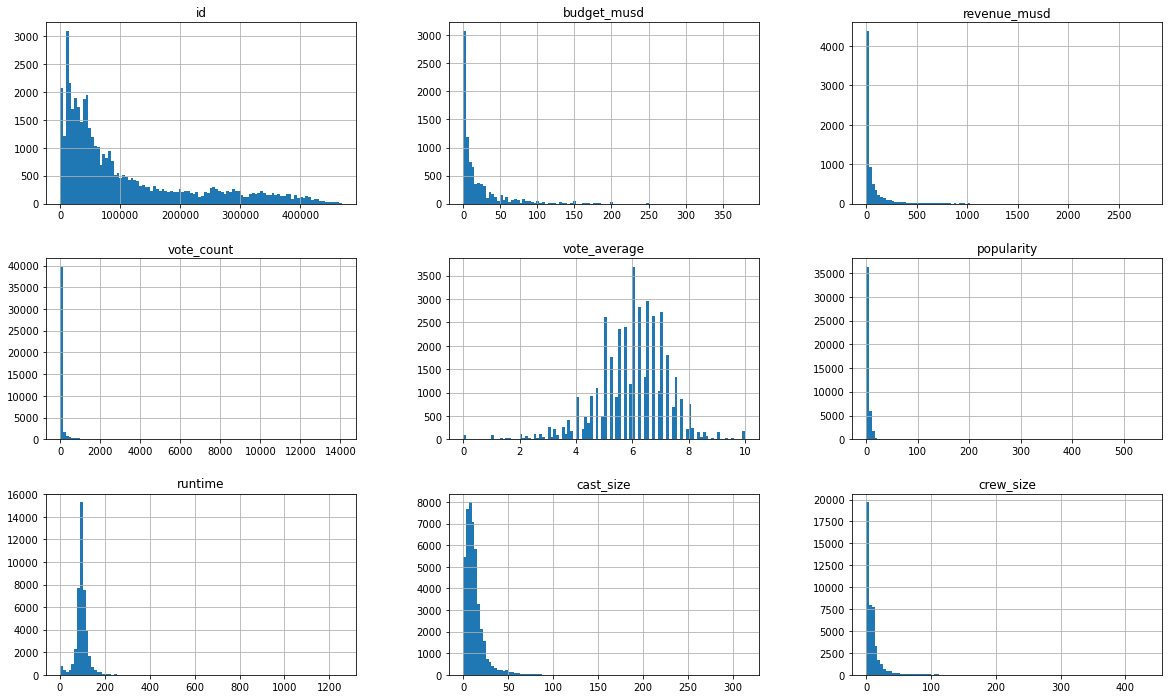

In [168]:
df.hist(figsize=(20,12),bins=100) #trellis chart
plt.show()

In [169]:
df['revenue_musd'].value_counts(dropna=False).head(10) #dtype=series, descending histogram

nan      37306
12.00       20
11.00       19
10.00       19
2.00        18
6.00        17
5.00        14
0.50        13
8.00        13
0.00        12
Name: revenue_musd, dtype: int64

In [170]:
df.describe(include='object')
df['title'] == 'Cinderella' #output=series of True or False meeting the criteria

0        False
1        False
2        False
3        False
4        False
         ...  
44686    False
44687    False
44688    False
44689    False
44690    False
Name: title, Length: 44691, dtype: bool

In [171]:
# df['title','budget_musd','revenue_musd','vote_count','vote_average','popularity'] #NOT ALLOWED as the parameters should generate a series if one column selected but cant if multiple columns are selected. correct form is to use double square brackets
df2=df[['title','budget_musd','revenue_musd','vote_count','vote_average','popularity']] #Correct
df2['profit_musd']=df2['revenue_musd'] - df2['budget_musd'] #new calculated column in existing df
df2['return']=df2['revenue_musd'] / df2['budget_musd']
df2

,title,budget_musd,revenue_musd,vote_count,vote_average,popularity,profit_musd,return
0,Toy Story,30.00,373.55,5415.00,7.70,21.95,343.55,12.45
1,Jumanji,65.00,262.80,2413.00,6.90,17.02,197.80,4.04
2,Grumpier Old Men,nan,nan,92.00,6.50,11.71,nan,nan
3,Waiting to Exhale,16.00,81.45,34.00,6.10,3.86,65.45,5.09
4,Father of the Bride Part II,nan,76.58,173.00,5.70,8.39,nan,nan
...,...,...,...,...,...,...,...,...
44686,Subdue,nan,nan,1.00,4.00,0.07,nan,nan
44687,Century of Birthing,nan,nan,3.00,9.00,0.18,nan,nan
44688,Betrayal,nan,nan,6.00,3.80,0.90,nan,nan
44689,Satan Triumphant,nan,nan,0.00,nan,0.00,nan,nan


In [172]:
df2.columns=['Title','Budget','Revenue','Vote Count','Average Vote','Popularity','Profit','Return'] #change columns to make presentation ready
df2.set_index('Title',inplace=False) #change the index - columns will reduce - make the array more user friendly to slice using iloc

,Budget,Revenue,Vote Count,Average Vote,Popularity,Profit,Return
Title,,,,,,,
Toy Story,30.00,373.55,5415.00,7.70,21.95,343.55,12.45
Jumanji,65.00,262.80,2413.00,6.90,17.02,197.80,4.04
Grumpier Old Men,nan,nan,92.00,6.50,11.71,nan,nan
Waiting to Exhale,16.00,81.45,34.00,6.10,3.86,65.45,5.09
Father of the Bride Part II,nan,76.58,173.00,5.70,8.39,nan,nan
...,...,...,...,...,...,...,...
Subdue,nan,nan,1.00,4.00,0.07,nan,nan
Century of Birthing,nan,nan,3.00,9.00,0.18,nan,nan
Betrayal,nan,nan,6.00,3.80,0.90,nan,nan


In [173]:
'''
df2.iloc[[1]] #like regular python slicing [rowStart:rowEnd,colStart:colEnd] - Note: you can't use native python slicing directly in df [df2[:2] is allowed, but df2[:2,3:5] is not allowed]. df2.iloc[[1]] will output df; df2.iloc[1] will output series
df2.iloc[[7,2,0]] #more examples - parameter is a list
df2.iloc[[7,2,0],[1,6,7]] #more examples - parameters for both rows and columns are lists
df2.iloc[:,2] #all rows but only the third column
df2.loc[['Jumanji']] #loc needs index name as paramete
df2.loc[['Jumanji','Toy Story'],['Revenue','Popularity']] #more examples
df2.loc[df2['Revenue']>262.80] #the parameter is a boolean array of True and False depending on the condition
df2.loc[(df2['Revenue']>262) & (df2['Revenue']<263)] #multiple conditions evaluation
# if you know row indexes and column names then choose loc otherwise use iloc
df2.loc[(df2['Revenue']>262) & (df2['Revenue']<263),'NewCol']='BIG' #Adds new column called NewCol where the condition is satisfied and the values 'BIG' will appear in that cell
df2.loc[df2['Budget']>5].sort_values(by='Return',ascending=False) #think before you sort - some filter is usually required before sorting
df2.Budget.fillna(0, inplace=True) #decide carefully at beginning of data profiling what to do with Nulls ->maybe make Nulls as zero for all numeric columns
df2=df.copy() #always copy() as indexing will work on original df (indexes are memory pointers and carry across for the same range i.e. Noconcatenate)
#no direct search via contains -> create boolean mask columns and use them with str.contains ==> df[df['genres'].str.contains('Science Fiction') & df['genres'].str.contains('Action')]. Use notna() or notnull() to remove values which do not have these values, so series will have less rows than df
#if column is date format then you can use df['release_date'].between('2010-01-01','2015-12-31')
# (df['genres'].str.contains('Action') | df['genres'].str.contains('Thriller')).sum() will give count of OR
#str.lower.contains('without') looking for data cleaning with wrong values or missing values
#mask_studio = df.production_companies.str.contains('pixar', case=False) - case insensitive search
#df['Franchise']=df['belongs_to_collection'].notna() - creates a boolean mask with these
#df['Franchise'].value_counts()
df.groupby('Franchise').revenue_musd.mean() - do aggregation using groupby
df.groupby('Franchise').agg({'budget_musd':'median','revenue_musd':'median','vote_count':'mean','popularity':'mean'}) -> many agg in one go
df.nlargest(20,'revenue_musd') #gives largest to smallest sort
one technique to tide over nan is to convert the data type to string. useful if str.contains will be used later to search. e.g. df.genres.astype(str).str.contains('Horror')
df.set_index('id',inplace=True) #index setting using a uuid in the df
change the index to a column by index_col: pdf.read_csv('',index_col='Athlete')
df2.iloc[0:1] == df2[0:1] - both are same
df2.iloc[0:1].equals(df2[0:1]) #method to compare equality of dataframes
df2.iloc[[1,5,10]] cant be done natively
df2.nunique() will give unique counts in each columns
df2.groupby(by='Year').nunique()
df2['Year'].unique() - output is the values
df2['age'].value_counts()

'''

"\ndf2.iloc[[1]] #like regular python slicing [rowStart:rowEnd,colStart:colEnd] - Note: you can't use native python slicing directly in df [df2[:2] is allowed, but df2[:2,3:5] is not allowed]. df2.iloc[[1]] will output df; df2.iloc[1] will output series\ndf2.iloc[[7,2,0]] #more examples - parameter is a list\ndf2.iloc[[7,2,0],[1,6,7]] #more examples - parameters for both rows and columns are lists\ndf2.iloc[:,2] #all rows but only the third column\ndf2.loc[['Jumanji']] #loc needs index name as paramete\ndf2.loc[['Jumanji','Toy Story'],['Revenue','Popularity']] #more examples\ndf2.loc[df2['Revenue']>262.80] #the parameter is a boolean array of True and False depending on the condition\ndf2.loc[(df2['Revenue']>262) & (df2['Revenue']<263)] #multiple conditions evaluation\n# if you know row indexes and column names then choose loc otherwise use iloc\ndf2.loc[(df2['Revenue']>262) & (df2['Revenue']<263),'NewCol']='BIG' #Adds new column called NewCol where the condition is satisfied and the v

In [174]:
file=r"C:\Users\John\Downloads\Udemy_Pandas\Appendix_Materials\titanic.csv"
df2=pd.read_csv(file)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [199]:
df2['age'].value_counts(sort=False)

22.00    27
38.00    11
26.00    18
35.00    18
54.00     8
         ..
0.92      1
0.83      2
0.67      1
70.50     1
0.42      1
Name: age, Length: 88, dtype: int64

## The best and the worst movies...

2. __Filter__ the Dataset and __find the best/worst n Movies__ with the

- Highest Revenue
- Highest Budget
- Highest Profit (=Revenue - Budget)
- Lowest Profit (=Revenue - Budget)
- Highest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10) 
- Lowest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10)
- Highest number of Votes
- Highest Rating (only movies with 10 or more Ratings)
- Lowest Rating (only movies with 10 or more Ratings)
- Highest Popularity

__Define__ an appropriate __user-defined function__ to reuse code.

__Movies Top 5 - Highest Revenue__

__Movies Top 5 - Highest Budget__

__Movies Top 5 - Highest Profit__

__Movies Top 5 - Lowest Profit__

__Movies Top 5 - Highest ROI__

__Movies Top 5 - Lowest ROI__

__Movies Top 5 - Most Votes__

__Movies Top 5 - Highest Rating__

__Movies Top 5 - Lowest Rating__

__Movies Top 5 - Most Popular__

## Find your next Movie

3. __Filter__ the Dataset for movies that meet the following conditions:

__Search 1: Science Fiction Action Movie with Bruce Willis (sorted from high to low Rating)__

__Search 2: Movies with Uma Thurman and directed by Quentin Tarantino (sorted from short to long runtime)__

__Search 3: Most Successful Pixar Studio Movies between 2010 and 2015 (sorted from high to low Revenue)__

__Search 4: Action or Thriller Movie with original language English and minimum Rating of 7.5 (most recent movies first)__

## Are Franchises more successful?

4. __Analyze__ the Dataset and __find out whether Franchises (Movies that belong to a collection) are more successful than stand-alone movies__ in terms of:

- mean revenue
- median Return on Investment
- mean budget raised
- mean popularity
- mean rating

hint: use groupby()

__Franchise vs. Stand-alone: Average Revenue__

__Franchise vs. Stand-alone: Return on Investment / Profitability (median)__

__Franchise vs. Stand-alone: Average Budget__

__Franchise vs. Stand-alone: Average Popularity__

__Franchise vs. Stand-alone: Average Rating__

## Most Successful Franchises

5. __Find__ the __most successful Franchises__ in terms of

- __total number of movies__
- __total & mean budget__
- __total & mean revenue__
- __mean rating__

## Most Successful Directors

6. __Find__ the __most successful Directors__ in terms of

- __total number of movies__
- __total revenue__
- __mean rating__